In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd

In [12]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# Create engine

engine = create_engine('sqlite:///hawaii.sqlite')

In [15]:
# Create base class for automap Schema (sets foundation)
Base = automap_base()

In [16]:
# Reflect tables using prepare() function

Base.prepare(engine, reflect=True)

In [17]:
# We can view all of the classes that automap found using Base.classes(), Base.classes.keys() gives names of classes

Base.classes
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table

Measurement = Base.classes.measurement

Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Climate Analysis

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

prev_year = prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
    # use filter() function to filter out the data we don't need
    # query using session.query reference the Measurement table

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

# Perform a query to retrieve the data and precipitation scores

date_prcp_df = pd.DataFrame(results, columns=['date','precipitation'])

# Save the query results as a Pandas DataFrame and set the index to the date column

date_prcp_df.set_index(date_prcp_df['date'], inplace=True)

# Sort the dataframe by date
# Sort w/o index - print(date_prcp_df.to_string(index=False))

print(date_prcp_df.sort_index())

# Use Pandas Plotting with Matplotlib to plot the data

# date_prcp_df.plot()

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-23  2016-08-23            NaN
2016-08-23  2016-08-23           1.79
2016-08-23  2016-08-23           0.05
2016-08-23  2016-08-23           0.15
...                ...            ...
2017-08-22  2017-08-22           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.08
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-03-12'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2017-01-09'),
  Text(1000.0, 0, '2017-08-14'),
  Text(1500.0, 0, '2017-07-21'),
  Text(2000.0, 0, '2016-12-24'),
  Text(2500.0, 0, '')])

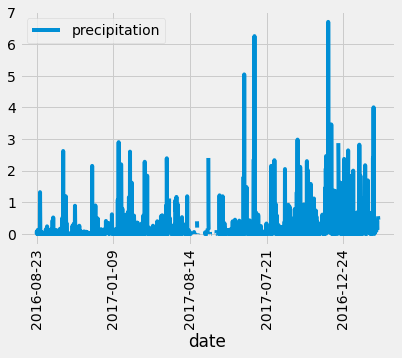

In [25]:
date_prcp_df.plot()
plt.xticks(rotation='vertical')

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data

date_prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge